In [266]:
#Git Hub link:
#https://github.com/christacaggiano/machine_learning_exercises/blob/main/chest_pain_prediction.ipynb
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2, VarianceThreshold
from sklearn.pipeline import make_pipeline



In [267]:
SwedishcleanedDf = pd.read_csv("cleaned_SwedishData.csv", delimiter=",")
SwedishexpressionData = pd.read_csv("cleaned_ExpressionData.csv", delimiter=",")

SpanishcleanedDftest = pd.read_csv("cleaned_SpanishData.csv", delimiter=",")
SpanishexpressionDatatest = pd.read_csv("cleaned_SpanishExpressionData.csv", delimiter=",")

cleanedDf = pd.concat([SwedishcleanedDf, SpanishcleanedDftest])
expressionData = pd.concat([SwedishexpressionData, SpanishexpressionDatatest])

In [268]:
cleanedDf

,!Sample_geo_accession,Gender,Age,Allergy,Asthma,Dermatitis,rhinitis
0,GSM4209620,1,195.559200,1,0,1,0
1,GSM4209621,1,204.046100,0,0,0,0
2,GSM4209622,0,201.677600,1,1,1,0
3,GSM4209623,1,205.625000,1,1,0,0
4,GSM4209624,0,202.894700,0,0,0,0
...,...,...,...,...,...,...,...
196,GSM4210249,1,55.162218,1,0,1,0
197,GSM4210250,0,47.460000,0,0,0,0
198,GSM4210251,0,47.610000,1,1,1,0
199,GSM4210252,1,48.030000,0,0,0,0


In [269]:
expressionData.head()

,TC01000001.hg.1,TC01000002.hg.1,TC01000003.hg.1,TC01000004.hg.1,TC01000005.hg.1,TC01000006.hg.1,TC01000007.hg.1,TC01000008.hg.1,TC01000009.hg.1,TC01000010.hg.1,...,TCUn_gl000228000012.hg.1,TCUn_gl000228000013.hg.1,TCUn_gl000228000014.hg.1,TCUn_gl000237000001.hg.1,TCUn_gl000237000002.hg.1,TCUn_gl000241000001.hg.1,TCUn_gl000241000002.hg.1,TCUn_gl000243000001.hg.1,TCUn_gl000243000002.hg.1,TCUn_gl000247000001.hg.1
0,7.429823,4.388578,2.371792,5.275303,9.702489,11.799802,12.070954,6.996882,1.614111,3.492010,...,2.657722,6.307265,4.691915,6.020328,5.831065,5.642116,5.795866,6.400864,6.347468,6.400864
1,6.185963,4.001252,1.935577,6.272907,10.218112,11.969852,12.667002,8.177514,1.529896,3.043273,...,3.153498,6.036182,4.904974,5.684232,5.599217,5.592368,5.775740,5.094467,6.672159,5.094467
2,7.825112,4.261002,2.641741,5.066341,9.856455,11.973046,12.180124,7.075101,2.286690,3.299668,...,2.677549,6.229489,4.804676,5.898304,5.818457,5.232601,5.374681,3.737465,6.181059,3.737465
3,5.970286,4.018165,1.942758,5.142228,10.081747,12.224622,12.343981,8.123771,1.429856,3.175787,...,2.634139,6.276416,5.101769,5.800389,5.764109,5.830511,5.962839,5.765790,6.613098,5.765790
4,5.057495,4.067344,1.857217,5.073486,9.537027,11.809516,12.237580,7.427976,1.512572,3.546307,...,2.637874,6.438287,5.226228,5.960240,5.819446,5.534489,5.722457,5.056717,6.293271,5.056717


In [287]:
y = cleanedDf["Allergy"].values
x = expressionData.values
gene_ids = list(expressionData)

In [120]:
#filter low count and high count
#take mean and std of entire dataframe
col_means = np.mean(x, axis=0)

col_stdevs = np.std(x, axis=0)

mean_mean = np.mean(col_means)

threshold = 2 * np.mean(col_stdevs)

keep_cols = np.abs(col_means - mean_mean) < threshold

x = x[:, keep_cols]
x.shape
col_means.shape
threshold

0.47215307805353424

In [288]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x.shape

(457, 67528)

In [39]:
#scaler = MinMaxScaler()
#scaler.fit(x2)
#x2 = scaler.transform(x2)

NameError: name 'x2' is not defined

(457, 67518)

In [289]:
#KBest
selector = SelectKBest(f_classif, k=325)
x_new = selector.fit_transform(x, y)
#x_new = selector.fit_transform(filtered_df, y)

selected_feature_indices = selector.get_support(indices=True)


#x_new = SwedishexpressionData.iloc[:, selected_feature_indices]
#scaler.fit(x_new)
#x_new = scaler.transform(x_new)

#y = SwedishcleanedDf["Allergy"].values

x_new = SpanishexpressionDatatest.iloc[:, selected_feature_indices]
scaler.fit(x_new)
x_new = scaler.transform(x_new)
y = SpanishcleanedDftest["Allergy"].values

index_list = selector.get_support(indices=True)
index_list
gene_ids = list(expressionData)
gene_names = [gene_ids[i] for i in index_list]



x_new.shape

(201, 325)

In [99]:
#chi squared
selector = SelectKBest(chi2, k=725)
x_new = selector.fit_transform(x, y)
index_list = selector.get_support(indices=True)
index_list
gene_ids = list(expressionData)
gene_names = [gene_ids[i] for i in index_list]



In [104]:
#chi squared
selector = SelectKBest(chi2, k=325)
x2_new = selector.fit_transform(x2, y2)
index_list2 = selector.get_support(indices=True)
index_list2
gene_ids2 = list(expressionDatatest)
gene_names2 = [gene_ids2[i] for i in index_list2]
gene_names2


NameError: name 'x2' is not defined

In [105]:
#Variance
selector = VarianceThreshold(0.4551)
x_new = selector.fit_transform(x)

x_new.shape

ValueError: No feature in X meets the variance threshold 0.45510

In [106]:
#Std
stds = []
for f in range(67528):
    column = x[:,f]
    #print(column.std(), f)
    stds.append((column.std(),f))
stds.sort(reverse=True)
stds = [t[1] for t in stds]
x_new = x[:,stds]
x_new = x_new[:,:50000]

x_new.shape

(457, 50000)

In [132]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[ 0.90847199,  1.41805667,  0.74931575, ...,  1.07925569,
         0.05709288,  1.07925569],
       [-0.92867153, -1.08307239, -0.80710111, ..., -0.6367761 ,
         0.9184368 , -0.6367761 ],
       [ 1.49230127,  0.59423895,  1.71249219, ..., -2.41928087,
        -0.38436145, -2.41928087],
       ...,
       [-0.64109929,  0.15940028, -0.73632796, ..., -0.99889856,
         0.67299551, -0.99889856],
       [-0.09341263, -1.06179502, -1.07113066, ...,  0.16768574,
         0.03616156,  0.16768574],
       [ 0.00924621,  0.16628082, -0.8579271 , ...,  0.97278055,
        -0.44480247,  0.97278055]])

In [290]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_new, y, test_size=0.3, random_state=0)

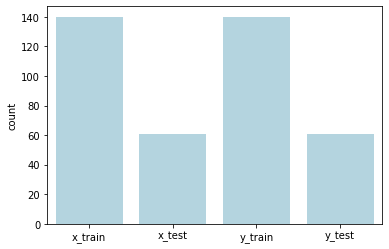

In [291]:
#plot training and testing data
sns.barplot(x=["x_train", "x_test", "y_train", "y_test"], 
            y=[len(x_train), len(x_test), len(y_train), len(y_test)],
           color="lightblue")
plt.ylabel("count")
plt.show()

In [159]:
#back into original swedish and spanish
SwedishX = x_new[:256, :]
SpanishX = x_new[256:, :]

SwedishY = y[:256]
SpanishY = y[256:]

SpanishX.shape

(0, 325)

In [292]:
lr = LogisticRegression(max_iter=1000)
#lr = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10, random_state=0)


In [249]:
x_train

array([[0.41313518, 0.4494198 , 0.57004535, ..., 0.5728048 , 0.69233871,
        0.66509055],
       [0.15992377, 0.59024751, 0.73118544, ..., 0.4624458 , 0.75725336,
        0.60705808],
       [0.46438359, 0.67538321, 0.56685002, ..., 0.49024232, 0.57534463,
        0.53791258],
       ...,
       [0.12886174, 0.62891425, 0.        , ..., 0.29617344, 0.95327725,
        0.90146348],
       [0.29763806, 0.52430185, 0.54887567, ..., 0.535278  , 0.53584649,
        0.53809579],
       [0.20513364, 0.55628642, 0.76356463, ..., 0.40901363, 0.90952156,
        0.78336508]])

In [293]:
#train on swedish

lr.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [294]:
x_train.shape

(140, 325)

In [295]:
y_train.shape

(140,)

In [296]:
#test on spanish
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0])

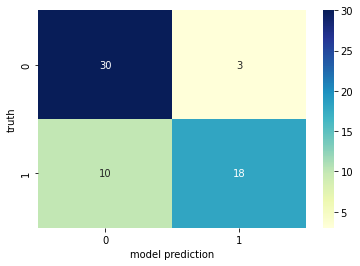

In [297]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

In [298]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        40
           1       0.64      0.86      0.73        21

    accuracy                           0.79        61
   macro avg       0.78      0.80      0.78        61
weighted avg       0.82      0.79      0.79        61



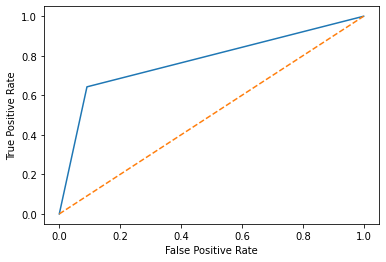

In [299]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [300]:
roc_auc_score(y_test, y_pred)

0.775974025974026

In [170]:
#train on spanish and test on swedish
lr.fit(SpanishX,SpanishY)
y_pred2 = lr.predict(SwedishX)
y_pred2


ValueError: Found array with 0 sample(s) (shape=(0, 325)) while a minimum of 1 is required.

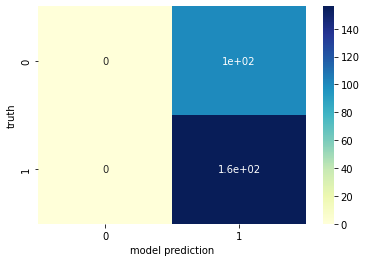

In [113]:
cnf_matrix = metrics.confusion_matrix(SwedishY, y_pred2) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

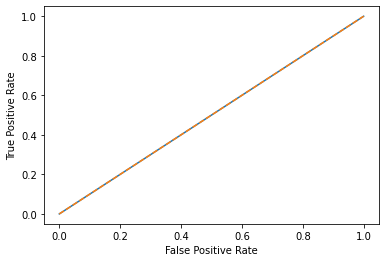

In [114]:
fpr, tpr, _ = roc_curve(SwedishY,  np.rint(y_pred2))

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
roc_auc_score(SwedishY, np.rint(y_pred2))

0.5

In [301]:
lst = list(np.exp(lr.coef_[0]))
lst = [(lst[i],i) for i in range(len(lst))]

In [285]:
SwedishBetas = lst

In [302]:
SpanishBetas = lst

In [321]:
SpanishBetas

[(0.9764245155142711, 0),
 (0.839054267697332, 1),
 (1.0240633333783808, 2),
 (1.1259194067386742, 3),
 (1.2013704320990293, 4),
 (1.2893596641276257, 5),
 (1.4375048893373499, 6),
 (0.9039962635118618, 7),
 (1.0202591880847283, 8),
 (1.0675667446172237, 9),
 (0.8164864986237508, 10),
 (0.4718376402792855, 11),
 (1.8524085845946348, 12),
 (1.707036889397186, 13),
 (1.1364151214838574, 14),
 (0.9367201800233176, 15),
 (1.3140153603358227, 16),
 (1.180651865419193, 17),
 (1.2816914903155334, 18),
 (0.9629066065919645, 19),
 (1.4893987950481349, 20),
 (0.9532986330731292, 21),
 (1.8092754277650702, 22),
 (1.5798717528676542, 23),
 (1.2084348154576199, 24),
 (0.7617332653272303, 25),
 (1.0907796558311715, 26),
 (1.3530100519902124, 27),
 (1.1938281691409849, 28),
 (0.9571861423485335, 29),
 (0.9368766037156032, 30),
 (0.7015520449174887, 31),
 (0.7528257304950084, 32),
 (1.475823446641775, 33),
 (1.2440162792735419, 34),
 (0.6116692632819594, 35),
 (1.180004342874061, 36),
 (1.294343153087

In [316]:
SpanishBetas = sorted(SpanishBetas, key=lambda x: x[1])
SwedishBetas = sorted(SwedishBetas, key=lambda x: x[1])

<AxesSubplot:xlabel='Swedish Beta Values', ylabel='Spanish Beta Values'>

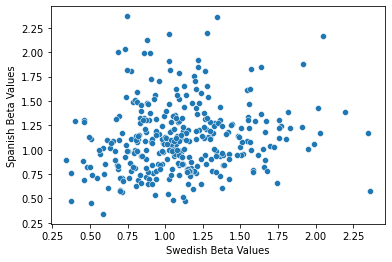

In [318]:
data = {'Swedish Beta Values': [b[0] for b in SwedishBetas], 'Spanish Beta Values': [b[0] for b in SpanishBetas]}
df = pd.DataFrame(data)
sns.scatterplot(x='Swedish Beta Values',y='Spanish Beta Values',data=df)

In [320]:
df = pd.DataFrame(data)

# Add a new column 'Group' to differentiate the two groups
df['Group'] = ['Swedish'] * len(SwedishBetas) + ['Spanish'] * len(SpanishBetas)

sns.scatterplot(x='Swedish Beta Values', y='Spanish Beta Values', hue='Group', data=df, palette={'Swedish': 'blue', 'Spanish': 'red'})

plt.xlabel('Swedish Beta Values')
plt.ylabel('Spanish Beta Values')



ValueError: Length of values (650) does not match length of index (325)

In [303]:
lst.sort(reverse = True)
count = 0
for e in lst:
    #if count< 10:
        print(str(e[0]) + "  " + str(selected_feature_indices[e[1]]) +"  "+ str(gene_names[e[1]]))
        
    #count+=1

2.370155037175149  47237  TC13000912.hg.1
2.36610030922038  49654  TC14001649.hg.1
2.1944580488754077  31425  TC09000341.hg.1
2.187586914327655  33542  TC09002491.hg.1
2.1641924254184857  33516  TC09002465.hg.1
2.127625374325064  44916  TC12001885.hg.1
2.038157192089877  52297  TC15002002.hg.1
1.9992564762029028  26470  TC07001372.hg.1
1.9927839410774482  53253  TC16000148.hg.1
1.9923188391218445  23065  TC06002065.hg.1
1.919853245501249  27048  TC07001970.hg.1
1.9117875691734127  24129  TC06003135.hg.1
1.876456989308833  52087  TC15001790.hg.1
1.8524085845946348  1923  TC01001965.hg.1
1.848883012755234  14195  TC03002917.hg.1
1.8288044750952852  38639  TC10001985.hg.1
1.8216381302995208  46899  TC13000570.hg.1
1.8176927872007225  38293  TC10001634.hg.1
1.810408091585989  54245  TC16001169.hg.1
1.8092754277650702  4462  TC01004544.hg.1
1.7839060393720463  21664  TC06000626.hg.1
1.7598128254237533  36190  TC0X002212.hg.1
1.7273803743604002  31712  TC09000634.hg.1
1.707036889397186  2112

<AxesSubplot:xlabel='Allergy', ylabel='TC01000001.hg.1'>

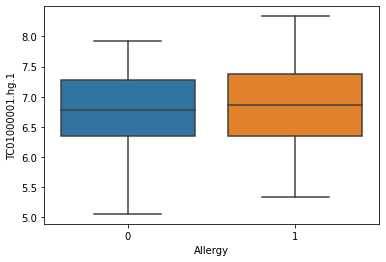

In [264]:
SwedishexpressionData
SwedishexpressionData["Allergy"] = SwedishcleanedDf["Allergy"].values

sns.boxplot(x="Allergy", y='TC01000001.hg.1', data=SwedishexpressionData)

<AxesSubplot:xlabel='Allergy', ylabel='TC01000001.hg.1'>

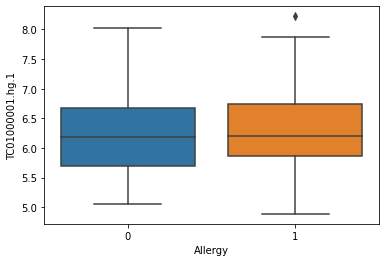

In [265]:
SpanishexpressionDatatest["Allergy"] = SpanishcleanedDftest["Allergy"].values

sns.boxplot(x="Allergy", y='TC01000001.hg.1', data=SpanishexpressionDatatest)

In [184]:

values_1 = SwedishexpressionData.loc[SwedishexpressionData['Allergy'] == 1, 'TC09002465.hg.1']
values_2 = SpanishexpressionDatatest.loc[SpanishexpressionDatatest['Allergy'] == 0, 'TC09002465.hg.1']

sns.catplot(data=pd.DataFrame([*values_1]), kind="swarm")
sns.catplot(data=pd.DataFrame([*values_2]), kind="swarm")

KeyError: 'Allergy'

In [181]:
values_1 = pd.DataFrame(SwedishexpressionData.loc[cleanedDf['Allergy'] == 1])
values_1["category"]  = "allergy"
values_2 = pd.DataFrame(SpanishexpressionDatatest.loc[cleanedDf['Allergy'] == 1])
values_2["category"]  = "control"
combined = pd.concat([values_1, values_2])
print(len(values_1))
print(combined)
axis = sns.swarmplot(data=combined,x="category",y="TC04002538.hg.1",color = "gray", alpha = 0.5)
sns.boxplot(data=combined,x="category",y="TC04002538.hg.1",ax = axis,)
plt.show()
#print(values_2)
#sns.catplot(data=pd.DataFrame([*values_2]), kind="swarm")

ValueError: cannot reindex from a duplicate axis